In [4]:
import numpy as np
import matplotlib.pyplot as plt


**Sigmoid function** 
- g(z) = 1 / (1+e^-z)
- maps all inputs to values between 0 and 1


In [5]:
# compute the sigmoid of z
def sigmoid(z):

    g = 1 / (1+np.exp(-z))

    return g


Text(0.5, 0, 'Input')

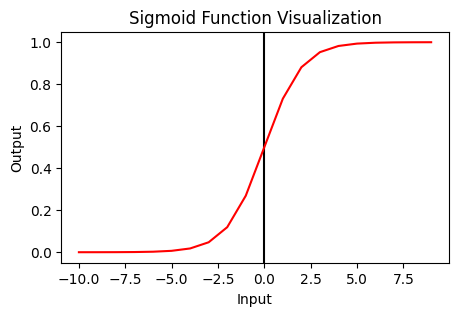

In [15]:
sample_inputs = np.arange(-10,10)
sample_outputs = sigmoid(sample_inputs)

fig, ax = plt.subplots(1, 1, figsize=(5,3))
plt.axvline(x=0, color='0', linestyle='-')
ax.plot(sample_inputs, sample_outputs, color='r')
ax.set_title("Sigmoid Function Visualization")
ax.set_ylabel("Output")
ax.set_xlabel("Input")



**Logistic Regression**
- for logistic regression, the sigmoid function is used where z is the output of a linear regression model (w⋅x + b)
g(w⋅x + b) = 1 / (1 + e^-[w⋅x + b])
- decision boundary lies at z = 0
- g can also be nonlienar for a nonlienar boundary (i.e g(w1x1^2 + w2x2^2 + b))


**Cost Function**
- if we tried to use MSE as the cost function, it would be very non-convex, with lots of local minima to get stuck in -> therefore not a good choice
- we should use: Loss = {
                            -log(f(xi)),     if yi = 1
                            -log(1 - f(xi)), if yi = 0
                        }

C:\Users\tjawo\AppData\Local\Temp\ipykernel_4596\2813160540.py:13: RuntimeWarning: divide by zero encountered in log
  positive_losses = -np.log(predicted)


Text(0, 0.5, 'Loss')

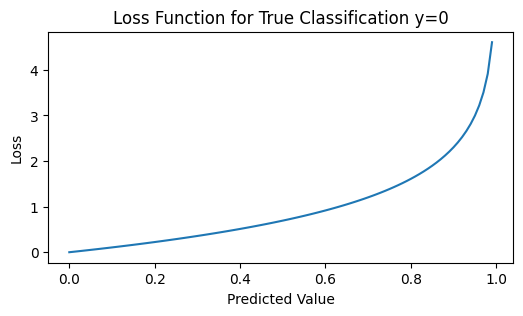

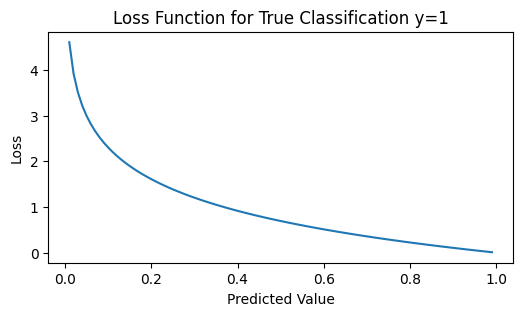

In [29]:
predicted = np.arange(0, 1, 0.01)

# Loss for y=0 (negative classification)
negative_losses = -np.log(1 - predicted)

fig, ax = plt.subplots(1, 1, figsize = (6,3))
ax.plot(predicted, negative_losses)
ax.set_title("Loss Function for True Classification y=0")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Loss")

# Loss for y=1 (positive classification)
positive_losses = -np.log(predicted)

fig, ax = plt.subplots(1, 1, figsize = (6,3))
ax.plot(predicted, positive_losses)
ax.set_title("Loss Function for True Classification y=1")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Loss")

In [ ]:
X_train = np.array([0, 1, 2, 3, 4, 5])
Y_train = np.array([0, 0, 0, 1, 1, 1])

